## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

## Load dataset

In [10]:
x = pd.ExcelFile('leaf.xlsx')
leaf = x.parse(skiprows=1)
leaf.head()

,1,1.1,0.72694,1.4742,0.32396,0.98535,1.2,0.83592,0.0046566,0.0039465,0.04779,0.12795,0.016108,0.0052323,0.00027477,1.1756
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


In [12]:
leaf.columns = ['Class', 'Specimen', 'Eccentricity', ' Aspect Ratio', 'Elongation',
               'Solidity', 'Stochastic Convexity', 'Isoperimetric Factor', 'Indentation Depth',
               'Lobedness', 'Intensity', 'Contrast', 'Smoothness', 'Third moment', 'Uniformity', 'Entropy']

In [13]:
leaf.head()

,Class,Specimen,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Indentation Depth,Lobedness,Intensity,Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


In [14]:
leaf = leaf[['Eccentricity', ' Aspect Ratio', 'Elongation', 'Solidity', 'Stochastic Convexity', 
             'Isoperimetric Factor', 'Indentation Depth', 'Lobedness', 'Intensity', 'Contrast',
             'Smoothness', 'Third moment', 'Uniformity', 'Entropy']]
leaf.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Indentation Depth,Lobedness,Intensity,Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


## Convert the data into a numpy array

In [15]:
x = leaf.values
x = scale(x);x

array([[ 0.1051157 , -0.35303272, -0.78418954, ..., -0.60857147,
        -0.724875  , -0.79678376],
       [ 0.227481  , -0.33502241, -0.63662948, ..., -0.94618473,
        -0.8105502 , -1.22955894],
       [ 0.08706574, -0.37843188, -0.82207797, ..., -0.90203653,
        -0.74474998, -0.98271072],
       ...,
       [-1.75887881, -0.54267976,  1.36782189, ...,  1.92543586,
         0.15142746,  0.9077633 ],
       [-0.57583828, -0.5004248 ,  1.02913008, ...,  0.04915596,
        -0.28515445, -0.01708398],
       [-1.189969  , -0.52066716,  1.73964048, ...,  1.42751239,
        -0.13677594,  0.68343355]])

## Create a covariance matrix

In [19]:
covar_matrix = PCA(n_components = 14) # we have 14 features

## Calculate Eigenvalues

In [20]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([40.6, 70.5, 85.5, 90.8, 93.9, 96.7, 97.9, 98.7, 99.2, 99.5, 99.7,
       99.8, 99.9, 99.9])

### In the above array we see that the first feature explains roughly 41% of the variance within our dataset, the 1st two explain 71 %,  the 1st three explain 86 % and so on. 

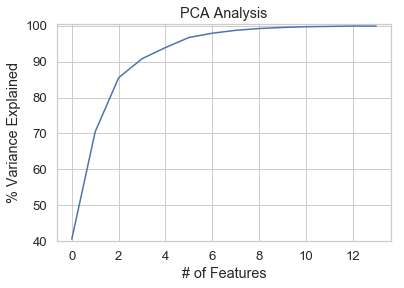

In [21]:
sb.set(font_scale=1.2,style="whitegrid") #set styling preferences
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(40,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

### Based on the plot above it's clear we should pick 7 features.